In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
dataset = pd.read_excel('dwm1.xlsx')
dataset=dataset.dropna(how="any")

X = dataset.iloc[:, [3, 4]].values

In [22]:
print(dataset)

     Hotel_id                                 Name  Rating(10)  Price(₹)  \
0           0                 BUNK Hotel Amsterdam         8.4      7887   
1           1                      YOTEL Amsterdam         8.1     15267   
2           2                      Multatuli Hotel         7.4     13063   
3           3                   nhow Amsterdam Rai         9.0     12854   
5           5           INNSiDE by Meliá Amsterdam         8.4     14123   
..        ...                                  ...         ...       ...   
520       520     Stadslogement Bij de Sassenpoort         8.4      8899   
521       521                 Mercure Hotel Zwolle         7.7     10205   
522       522         The Cabin at Zwolle Centraal         7.2      6123   
523       523                   Hanze Hotel Zwolle         7.2      7789   
524       524  Campanile Hotel & Restaurant Zwolle         6.4      6870   

     Discount (% OFF)  ReviewsCount  
0                65.0         778.0  
1          

In [23]:
print(X)

[[ 7887.    65.]
 [15267.    65.]
 [13063.    64.]
 ...
 [ 6123.    64.]
 [ 7789.    65.]
 [ 6870.    67.]]


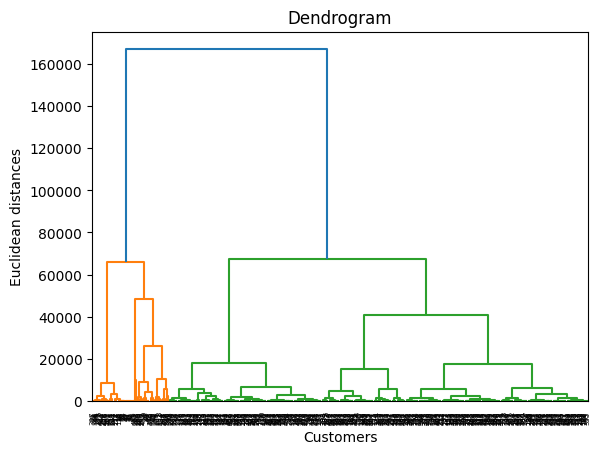

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


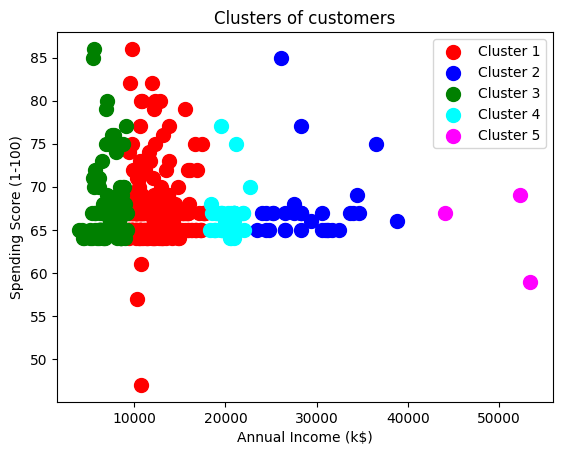

In [26]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()